In [37]:
#Importando librerias
import matplotlib.pyplot as plt
import numpy as np
import re

In [38]:
# Leyendo el archivo de numeros primos en decimal
primos_decimal = np.array([])
with open("Primos.txt", "r") as archivo_primos:
    for linea in archivo_primos:
        numero = re.findall('\d+',linea)
        if len(numero) > 0:
            primos_decimal = np.append(primos_decimal, numero[0])
archivo_primos.close()

def decimal_a_binario(numero):
    # Verificamos si el número es cero
    if numero == 0:
        return '0'
    
    # Inicializamos una lista vacía para almacenar los bits
    bits = []
    
    # Convertimos el número a binario
    while numero > 0:
        # Obtenemos el bit menos significativo y lo agregamos a la lista
        bits.append(str(numero % 2))
        # Dividimos el número entre 2 (lo desplazamos un bit a la derecha)
        numero //= 2
    
    # Convertimos la lista de bits en un string y la invertimos
    return ''.join(bits[::-1])

primos_binario = np.array([decimal_a_binario(int(decimal)) for decimal in primos_decimal])

with open('Primos_binario.txt', mode='w') as archivo_binario:
    archivo_binario.write('{ \n')
    for binario in primos_binario:
        archivo_binario.write(binario+',\n')
    archivo_binario.write('{ \n')
archivo_binario.close()

[0.     0.301  0.301  0.4771 0.4771 0.4771 0.301  0.4771 0.6021 0.6021
 0.699  0.4771 0.4771 0.6021 0.699  0.6021 0.699  0.699  0.4771 0.6021
 0.4771 0.699  0.6021 0.6021 0.4771 0.6021 0.699  0.699  0.699  0.6021
 0.8451 0.4771 0.4771 0.6021 0.6021 0.699  0.699  0.6021 0.699  0.699
 0.699  0.699  0.8451 0.4771 0.6021 0.699  0.699  0.8451 0.699  0.699
 0.699  0.8451 0.699  0.8451 0.301  0.6021 0.6021 0.699  0.6021 0.6021
 0.699  0.6021 0.699  0.7782 0.699  0.7782 0.699  0.6021 0.7782 0.7782
 0.6021 0.7782 0.8451 0.7782 0.8451 0.9031 0.6021 0.699  0.6021 0.699
 0.699  0.699  0.8451 0.699  0.8451 0.8451 0.6021 0.699  0.7782 0.8451
 0.7782 0.9031 0.8451 0.8451 0.8451]


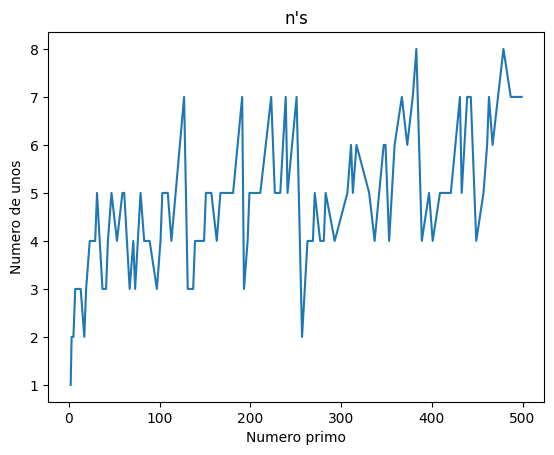

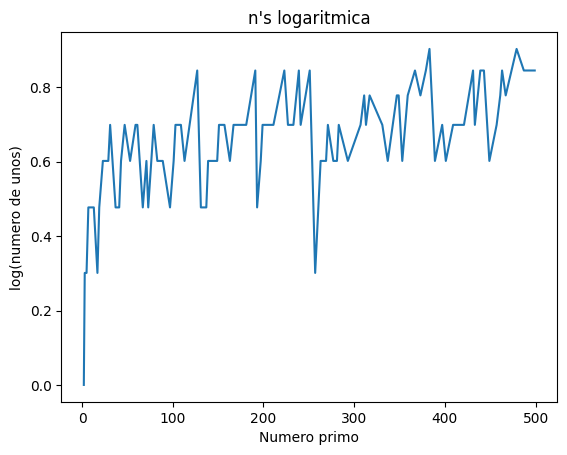

In [39]:
def contar_unos(cadena):
    # Inicializar el contador de unos
    contador_unos = 0

    # Recorrer cada dígito de la cadena
    for digito in cadena:
        # Si el dígito es igual a "1", sumar 1 al contador de unos
        if digito == '1':
            contador_unos += 1

    # Devolver el contador de unos
    return contador_unos

# Eje y : 'Numero de unos'
n_unos = np.array([contar_unos(binario) for binario in primos_binario])
np.set_printoptions(precision=4)
n_unos_log = np.emath.log10(n_unos)
print(n_unos_log)
# Eje x :'Primos'
primos = primos_decimal.astype(int)

plt.plot(primos, n_unos)
plt.title('n\'s')
plt.xlabel('Numero primo')
plt.ylabel('Numero de unos')
plt.show()

plt.plot(primos, n_unos_log)
plt.title('n\'s logaritmica')
plt.xlabel('Numero primo')
plt.ylabel('log(numero de unos)')
plt.show()
# TODO: Modificar grafico para que soporte grandes cantidades de numeros